In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#load the dataset
data = pd.read_csv("news.csv")
print(data.info())
print(data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None
(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [5]:
data = data.dropna()
data.shape

(6335, 4)

<Axes: xlabel='label'>

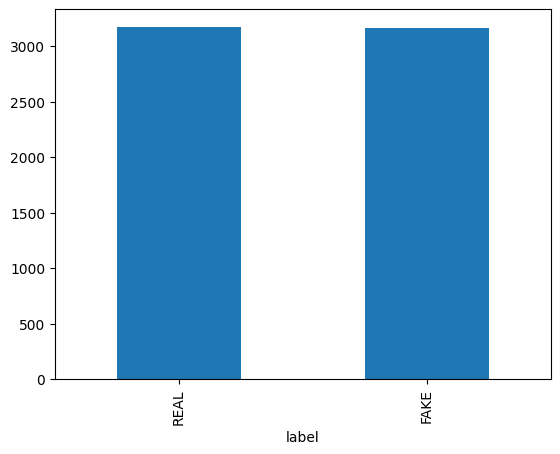

In [6]:
#plot the data.value_counts
data.label.value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

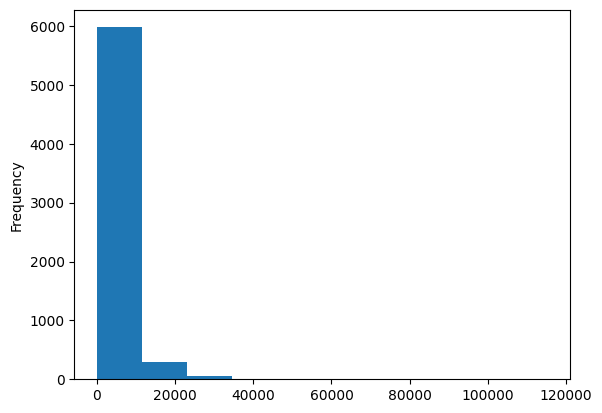

In [7]:
#plot the data.text column to determine the length of the texts
data.text.str.len().plot(kind='hist')

In [8]:
Labels = data.label
Labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(data['text'], Labels, test_size=0.2, random_state=42)



In [10]:
#initialize a tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

#fit and transform X_train and X_test
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [11]:
#initialize a passiveAgressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
#predict on the test test and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 93.69%


In [13]:
#confusion matrix and classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])



              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       628
        REAL       0.94      0.94      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



array([[588,  40],
       [ 40, 599]])

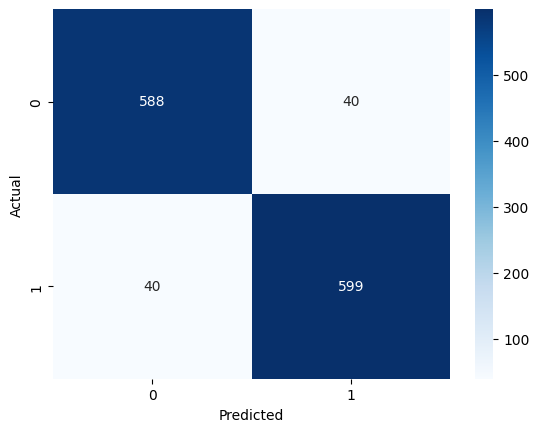

In [14]:
#use seaborn heatmap for confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
#save the model
import pickle
filename = 'Passive_aggresive_model.sav'
pickle.dump(pac, open(filename, 'wb'))

In [ ]:
#save the model to my drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
#use decision trees Random forest SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
#Random forest
Random_forest= RandomForestClassifier(n_estimators=200, random_state=0)
Random_forest.fit(tfidf_train, y_train)

#predict on X_test and get the accuracy
y_pred = Random_forest.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

#classfication report
print(classification_report(y_test, y_pred))

Accuracy: 91.48%
              precision    recall  f1-score   support

        FAKE       0.92      0.91      0.91       628
        REAL       0.91      0.92      0.92       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [18]:
#Decision tree
Decision = DecisionTreeClassifier(random_state=0)
Decision.fit(tfidf_train, y_train)

#predict on X_test and get the accuracy
y_pred = Decision.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

#classfication report
print(classification_report(y_test, y_pred))

Accuracy: 82.08%
              precision    recall  f1-score   support

        FAKE       0.82      0.82      0.82       628
        REAL       0.82      0.83      0.82       639

    accuracy                           0.82      1267
   macro avg       0.82      0.82      0.82      1267
weighted avg       0.82      0.82      0.82      1267



In [19]:
#support vector machine
SVM = SVC(kernel='linear')
SVM.fit(tfidf_train, y_train)

#predict on X_test and get the accuracy
y_pred = SVM.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

#classfication report
print(classification_report(y_test, y_pred))

Accuracy: 93.29%
              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93       628
        REAL       0.94      0.92      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [20]:
#multinomiial nb
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(tfidf_train, y_train)

#predict on X_test and get the accuracy
y_pred = MNB.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

#classfication report
print(classification_report(y_test, y_pred))

Accuracy: 84.53%
              precision    recall  f1-score   support

        FAKE       0.98      0.71      0.82       628
        REAL       0.77      0.98      0.87       639

    accuracy                           0.85      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.85      0.84      1267



In [21]:
# Save the Random Forest model
filename_rf = 'Random_forest_model.sav'
pickle.dump(Random_forest, open(filename_rf, 'wb'))

# Save the Decision Tree model
filename_dt = 'Decision_tree_model.sav'
pickle.dump(Decision, open(filename_dt, 'wb'))

# Save the SVM model
filename_svm = 'SVM_model.sav'
pickle.dump(SVM, open(filename_svm, 'wb'))
